The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [Internet Archive Wayback Machine](https://web.archive.org/web/20180630204548/http://seaborn.pydata.org/).  

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read dataset
df = pd.read_csv('files/Pokemon.csv', index_col=0)

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

(0, 141.9881096001028)

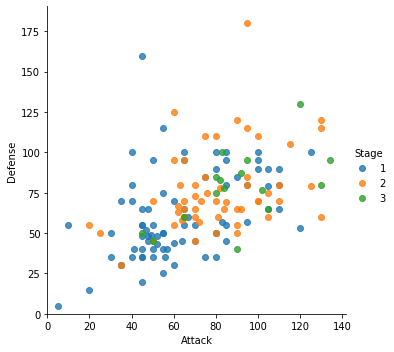

In [8]:
sns.lmplot(x='Attack',y='Defense',data=df,
          fit_reg=False, #No regression line
          hue='Stage') #Color by evolution stage
plt.ylim(0,None)
plt.xlim(0,None)#State where x and y starts

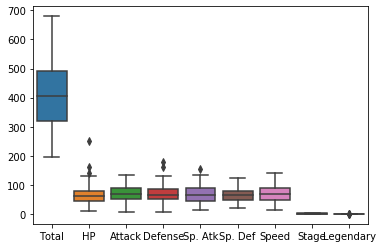

In [11]:
sns.boxplot(data=df)

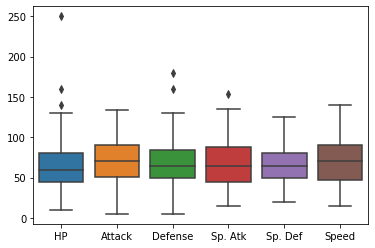

In [12]:
stats_df = df.drop(['Total','Stage','Legendary'], axis=1)
sns.boxplot(data=stats_df)

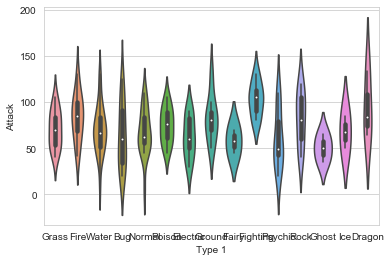

In [13]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y='Attack', data=df)

Seaborn allows us to set custom colour palettes. We can simply create an ordered Python List of colour hex values.

In [15]:
pkmn_type_colours = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

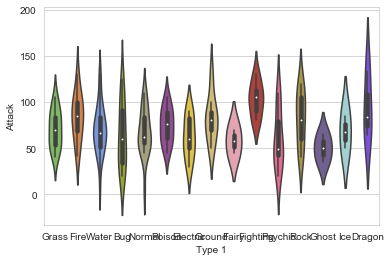

In [16]:
#Violin plot with Pokemon colour palette
sns.violinplot(x='Type 1',y='Attack',data=df,
              palette=pkmn_type_colours)#set colour palette

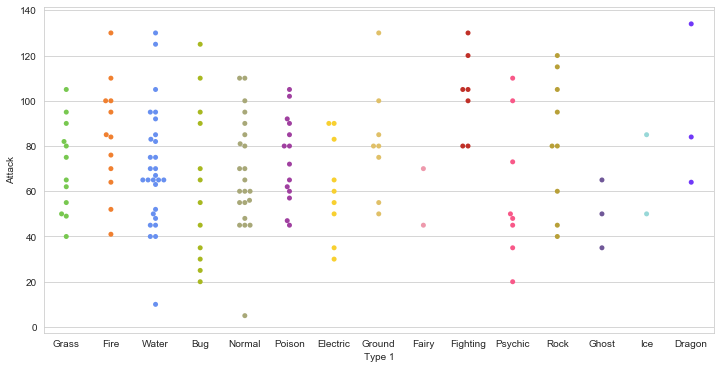

In [21]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Type 1',y='Attack',data=df,
             palette=pkmn_type_colours)


Text(0.5, 1.0, 'Attack by Type')

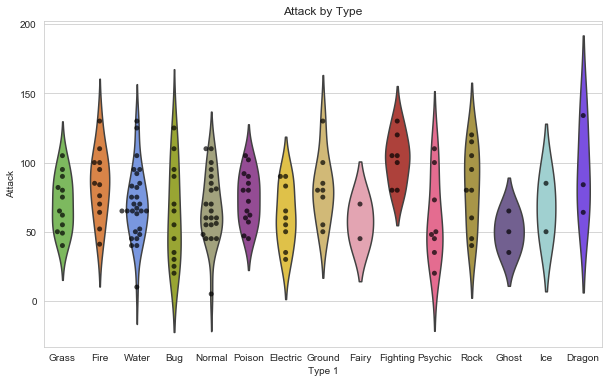

In [30]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Type 1',
              y=df.Attack,
              data=df,
              inner=None, #Remove the bars inside the violins
              palette=pkmn_type_colours)

sns.swarmplot(x='Type 1',
             y='Attack',
             data=df,
             color='k',#Make points black
             alpha=0.7) #and slightly transparent
#Set title with matplotlib
plt.title('Attack by Type')

1       49
2       62
3       82
4       52
5       64
6       84
7       48
8       63
9       83
10      30
11      20
12      45
13      35
14      25
15      90
16      45
17      60
18      80
19      56
20      81
21      60
22      90
23      60
24      85
25      55
26      90
27      75
28     100
29      47
30      62
      ... 
122     45
123    110
124     50
125     83
126     95
127    125
128    100
129     10
130    125
131     85
132     48
133     55
134     65
135     65
136    130
137     60
138     40
139     60
140     80
141    115
142    105
143    110
144     85
145     90
146    100
147     64
148     84
149    134
150    110
151    100
Name: Attack, Length: 151, dtype: int64

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://web.archive.org/web/20180621043054/https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles) on that for the version in Anaconda.

Text(0.5, 1.0, 'Distribution of Speed for Pokemon')

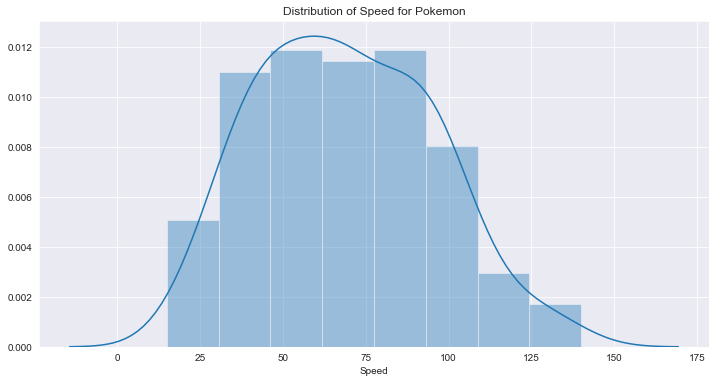

In [26]:
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")

## Step 9: Putting it all together

Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

In [35]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's melt() function. It takes 3 arguments:

First, the DataFrame to melt.
Second, ID variables to keep (Pandas will melt all of the other ones).
Finally, a name for the new, melted variable.

In [36]:
#Melt DataFrame

melted_df = pd.melt(stats_df,
                   id_vars=['Name','Type 1','Type 2'], #Variables to keep
                   var_name='Stat')#Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


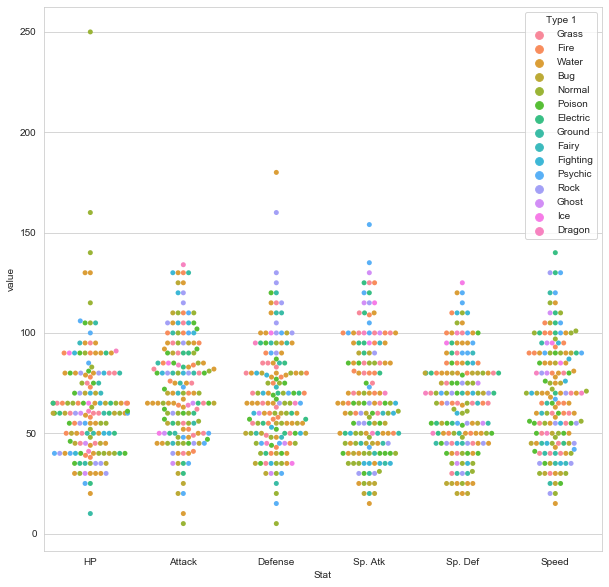

In [42]:
#Swarmplot with melted_df
plt.figure(figsize=(10,10))
sns.swarmplot(x='Stat', y='value', data=melted_df,
              hue='Type 1')

## 10.1 heatmap

Heatmaps help you visualise matrix-like data

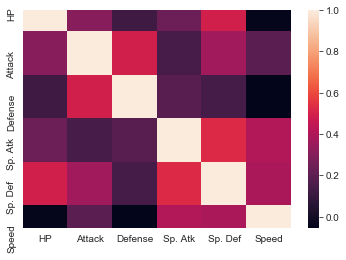

In [44]:
#Calculate correlations
corr = stats_df.corr()
# Heatmap
sns.heatmap(corr)

## 10.2 Histogram
Histograms allow you to plot the distributions of numeric variables.

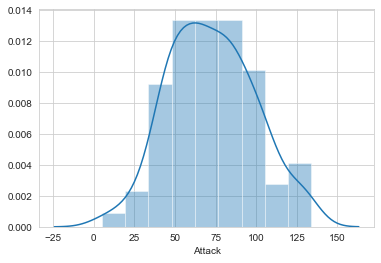

In [45]:
#Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

## 10.3 Barplot

Bar plots help you visualise the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

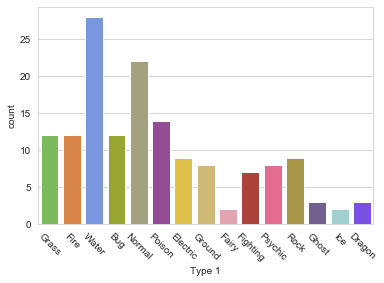

In [47]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colours)
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Factor Plot
Factor plots make it easy to separate plots by categorical classes.

C:\Users\Eddie\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


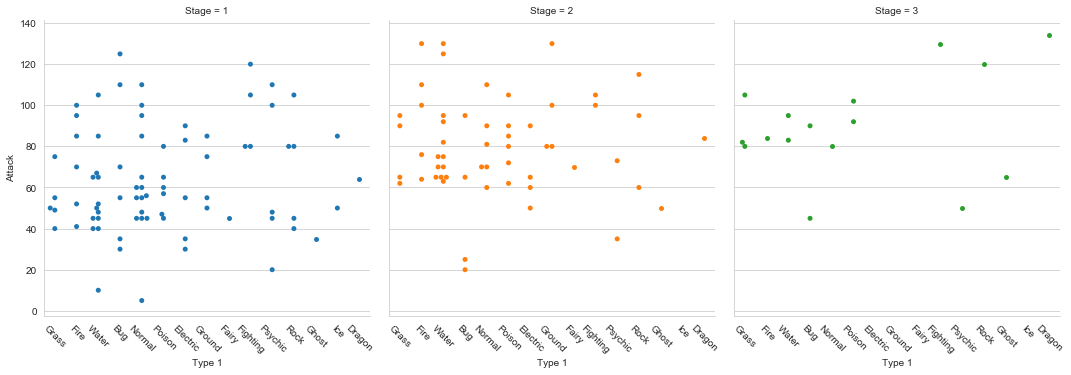

In [48]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)